In [1]:
#Data exploration and analysis:

# 1-distripution of male-female:
    # *bie chart
    # *bar chart

# 2-what is the distribution size of all images:
    # *histogram
    # *box plot
    # *split by gender

# 3- make descision what is the size of width and hieght

# 4- removing the images with less choosen  size

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import pickle

In [3]:
import cv2

In [4]:
from glob import glob

In [5]:
female_bath=glob('D://BISM/mlops/cropped_images_data/male/*.jpg')
male_bath=glob('D://BISM/mlops/cropped_images_data/female/*.jpg')

In [6]:
df_male=pd.DataFrame(male_bath , columns=['filepath'])
df_male['gender']='male'

In [7]:
df_male.head()

,filepath,gender
0,D://BISM/mlops/cropped_images_data/female\fema...,male
1,D://BISM/mlops/cropped_images_data/female\fema...,male
2,D://BISM/mlops/cropped_images_data/female\fema...,male
3,D://BISM/mlops/cropped_images_data/female\fema...,male
4,D://BISM/mlops/cropped_images_data/female\fema...,male


In [8]:
df_female=pd.DataFrame(female_bath , columns=['filepath'])
df_female['gender']='female'

In [9]:
df_female.head()

,filepath,gender
0,D://BISM/mlops/cropped_images_data/male\male0.jpg,female
1,D://BISM/mlops/cropped_images_data/male\male1.jpg,female
2,D://BISM/mlops/cropped_images_data/male\male10...,female
3,D://BISM/mlops/cropped_images_data/male\male10...,female
4,D://BISM/mlops/cropped_images_data/male\male10...,female


In [10]:
df=pd.concat((df_male , df_female) , axis=0)

In [11]:
df.head()

,filepath,gender
0,D://BISM/mlops/cropped_images_data/female\fema...,male
1,D://BISM/mlops/cropped_images_data/female\fema...,male
2,D://BISM/mlops/cropped_images_data/female\fema...,male
3,D://BISM/mlops/cropped_images_data/female\fema...,male
4,D://BISM/mlops/cropped_images_data/female\fema...,male


In [12]:
df.shape

(5020, 2)

In [13]:
def getSize(path):
    img=cv2.imread(path)
    return img.shape[0]

In [14]:
df['dimentions']=df['filepath'].apply(getSize)

In [15]:
df.head()

,filepath,gender,dimentions
0,D://BISM/mlops/cropped_images_data/female\fema...,male,273
1,D://BISM/mlops/cropped_images_data/female\fema...,male,182
2,D://BISM/mlops/cropped_images_data/female\fema...,male,122
3,D://BISM/mlops/cropped_images_data/female\fema...,male,122
4,D://BISM/mlops/cropped_images_data/female\fema...,male,182


In [16]:
genders_count=df['gender'].value_counts()

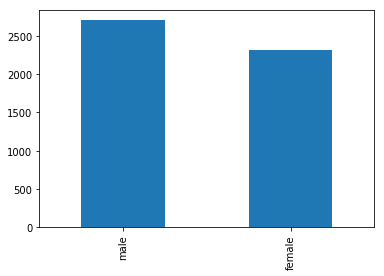

In [17]:
(genders_count).plot(kind='bar')

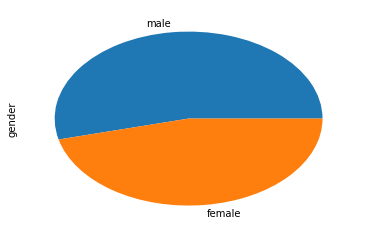

In [18]:
(genders_count).plot(kind='pie')

In [19]:
#so we have equal distributions between male and females

In [20]:
dimentions_count=df['dimentions'].value_counts()

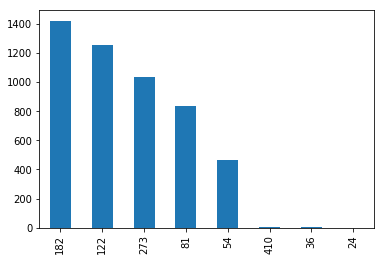

In [21]:
dimentions_count.plot(kind='bar')

(array([ 470.,  834., 1251.,    0., 1421.,    0., 1036.,    0.,    0.,
           8.]),
 array([ 24. ,  62.6, 101.2, 139.8, 178.4, 217. , 255.6, 294.2, 332.8,
        371.4, 410. ]),
 <a list of 10 Patch objects>)

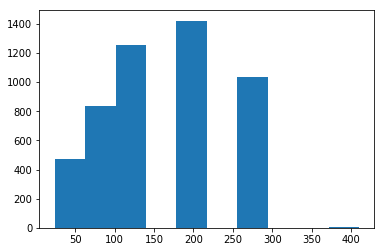

In [22]:
plt.hist(df['dimentions'])

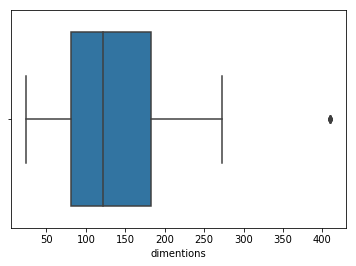

In [23]:
sns.boxplot(df['dimentions'])

so we will consider the dimention of all images to be more thab 60 , lets say (100*100)

# Filtering the Data

df.query() 

is a method in Pandas that allows us to filter rows in a DataFrame based on a boolean expression. The method takes a string argument that represents the boolean expression and returns a new DataFrame containing only the rows that satisfy the expression.

In [24]:
df_filter=df.query('dimentions >60')

In [25]:
df_filter

,filepath,gender,dimentions
0,D://BISM/mlops/cropped_images_data/female\fema...,male,273
1,D://BISM/mlops/cropped_images_data/female\fema...,male,182
2,D://BISM/mlops/cropped_images_data/female\fema...,male,122
3,D://BISM/mlops/cropped_images_data/female\fema...,male,122
4,D://BISM/mlops/cropped_images_data/female\fema...,male,182
...,...,...,...
2309,D://BISM/mlops/cropped_images_data/male\male99...,female,273
2311,D://BISM/mlops/cropped_images_data/male\male99...,female,122
2313,D://BISM/mlops/cropped_images_data/male\male99...,female,122
2314,D://BISM/mlops/cropped_images_data/male\male99...,female,81


In [26]:
df_filter.shape

(4550, 3)

In [27]:
df_filter['gender'].value_counts(normalize=True)

male      0.543297
female    0.456703
Name: gender, dtype: float64

In [28]:
def resizingImages(path):
    try:
        img=cv2.imread(path)
        gray_img=cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
        size=gray_img.shape[0]
        if size>=100:        
            gray_resized=cv2.resize(gray_img,(100,100) , cv2.INTER_AREA)
        else:
            gray_resized=cv2.resize(gray_img,(100,100) , cv2.INTER_CUBIC)

        flatten_img=gray_resized.flatten()
        print("succesfull operation")

        return flatten_img
    except:
        print("failed operation")
        return None
        
    

In [29]:
df_filter['data']=df_filter['filepath'].apply(resizingImages)

succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull op

succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull op

succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull op

succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull op

succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull op

succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull op

succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull op

succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull op

succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull op

succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull op

succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull operation
succesfull op

C:\Users\kerolos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_filter.head()

,filepath,gender,dimentions,data
0,D://BISM/mlops/cropped_images_data/female\fema...,male,273,"[188, 182, 182, 185, 174, 181, 192, 180, 217, ..."
1,D://BISM/mlops/cropped_images_data/female\fema...,male,182,"[32, 23, 31, 27, 28, 30, 28, 33, 36, 30, 46, 8..."
2,D://BISM/mlops/cropped_images_data/female\fema...,male,122,"[49, 49, 35, 34, 42, 40, 35, 39, 71, 62, 46, 4..."
3,D://BISM/mlops/cropped_images_data/female\fema...,male,122,"[132, 121, 118, 97, 85, 92, 91, 110, 155, 162,..."
4,D://BISM/mlops/cropped_images_data/female\fema...,male,182,"[234, 234, 234, 228, 231, 205, 122, 98, 74, 54..."


In [31]:
data=df_filter['data'].apply(pd.Series)

In [32]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,188,182,182,185,174,181,192,180,217,218,...,109,111,115,116,122,116,120,119,117,110
1,32,23,31,27,28,30,28,33,36,30,...,58,47,27,34,22,27,23,37,63,18
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,132,121,118,97,85,92,91,110,155,162,...,161,111,62,62,66,81,90,100,108,113
4,234,234,234,228,231,205,122,98,74,54,...,243,243,237,237,239,237,236,241,238,240


In [33]:
data.columns=[f'pixel{i}' for i in data.columns]

In [34]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9990,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999
0,188,182,182,185,174,181,192,180,217,218,...,109,111,115,116,122,116,120,119,117,110
1,32,23,31,27,28,30,28,33,36,30,...,58,47,27,34,22,27,23,37,63,18
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,132,121,118,97,85,92,91,110,155,162,...,161,111,62,62,66,81,90,100,108,113
4,234,234,234,228,231,205,122,98,74,54,...,243,243,237,237,239,237,236,241,238,240


# Data Normalization/

In [35]:
data=data/255

In [36]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9990,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999
0,0.737255,0.713725,0.713725,0.725490,0.682353,0.709804,0.752941,0.705882,0.850980,0.854902,...,0.427451,0.435294,0.450980,0.454902,0.478431,0.454902,0.470588,0.466667,0.458824,0.431373
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.227451,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.823529,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686
3,0.517647,0.474510,0.462745,0.380392,0.333333,0.360784,0.356863,0.431373,0.607843,0.635294,...,0.631373,0.435294,0.243137,0.243137,0.258824,0.317647,0.352941,0.392157,0.423529,0.443137
4,0.917647,0.917647,0.917647,0.894118,0.905882,0.803922,0.478431,0.384314,0.290196,0.211765,...,0.952941,0.952941,0.929412,0.929412,0.937255,0.929412,0.925490,0.945098,0.933333,0.941176


In [37]:
data['Gender']=df_filter['gender']

In [38]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,Gender
0,0.737255,0.713725,0.713725,0.725490,0.682353,0.709804,0.752941,0.705882,0.850980,0.854902,...,0.435294,0.450980,0.454902,0.478431,0.454902,0.470588,0.466667,0.458824,0.431373,male
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588,male
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,male
3,0.517647,0.474510,0.462745,0.380392,0.333333,0.360784,0.356863,0.431373,0.607843,0.635294,...,0.435294,0.243137,0.243137,0.258824,0.317647,0.352941,0.392157,0.423529,0.443137,male
4,0.917647,0.917647,0.917647,0.894118,0.905882,0.803922,0.478431,0.384314,0.290196,0.211765,...,0.952941,0.929412,0.929412,0.937255,0.929412,0.925490,0.945098,0.933333,0.941176,male


In [43]:
data.isnull().sum().sum()

0

In [44]:
data.shape

(4550, 10001)

In [45]:
## let us save the data

In [47]:
pickle.dump(data , open('D://BISM/mlops/cropped_images_data/data_img_100_100.pickle' , mode='wb'))